In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
import seaborn as sns

In [36]:
from pandas import Series, DataFrame

In [37]:
sns.set_style('whitegrid')

In [38]:
from pandas_datareader import DataReader

In [39]:
from datetime import datetime

In [40]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [41]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [42]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [10]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,194.318770,190.252698,192.269008,192.301945,3.256056e+07,190.705531
std,21.216679,20.941003,21.071273,21.027983,1.389687e+07,20.850288
min,145.720001,142.000000,143.979996,142.190002,1.136200e+07,140.505798
25%,175.967499,173.747501,174.872501,174.832497,2.291840e+07,173.452965
50%,199.055000,193.930000,196.434998,197.000000,2.942395e+07,195.877899
75%,209.260006,205.594994,207.717499,207.912502,3.883658e+07,206.560455
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,228.523819


In [11]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-09-10 to 2019-09-10
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


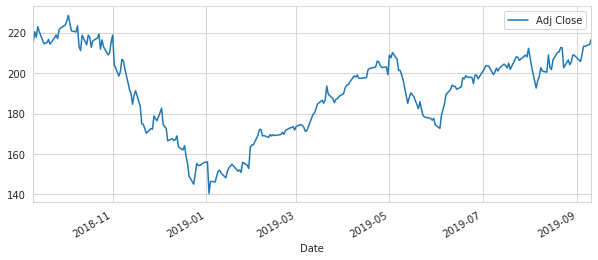

In [13]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

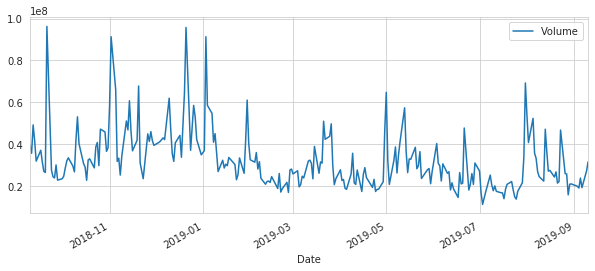

In [15]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

# idou heikin

In [20]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    APPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

AttributeError: module 'pandas' has no attribute 'rolling_mean'

In [23]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

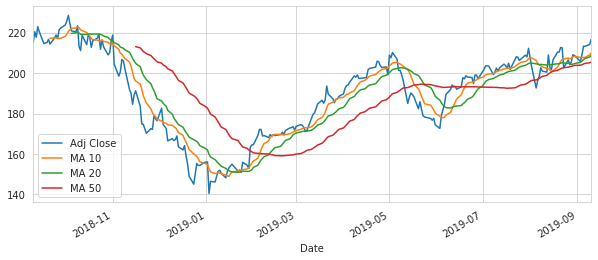

In [26]:
AAPL[['Adj Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [27]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [28]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2018-09-10,221.850006,216.470001,220.949997,218.330002,39516500.0,214.993759,NaN,NaN,NaN,NaN
2018-09-11,224.300003,216.559998,218.009995,223.850006,35749000.0,220.429443,NaN,NaN,NaN,0.025283
2018-09-12,225.000000,219.839996,224.940002,221.070007,49278700.0,217.691925,NaN,NaN,NaN,-0.012419
2018-09-13,228.350006,222.570007,223.520004,226.410004,41706400.0,222.950317,NaN,NaN,NaN,0.024155
2018-09-14,226.839996,222.520004,225.750000,223.839996,31999300.0,220.419571,NaN,NaN,NaN,-0.011351


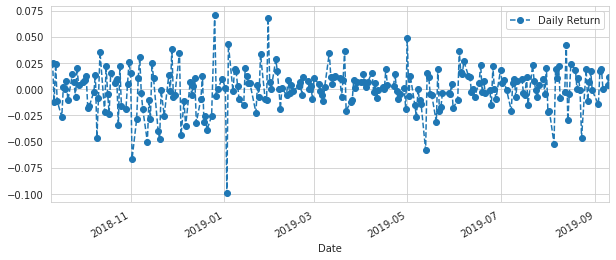

In [30]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

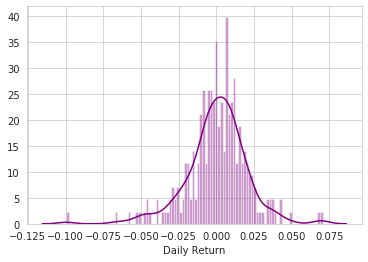

In [31]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

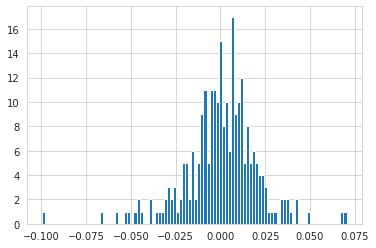

In [32]:
AAPL['Daily Return'].hist(bins=100)

In [46]:
closing_df = DataReader(['APPL', 'GOOG', 'MSFT', 'AMZN'], 'yahoo', start, end)['Adj Close']

KeyError: 'Date'